# Задание 1

Постройте нейронную сеть из одного нейрона и обучите её на датасетах nn_0.csv и nn_1.csv. 

Насколько отличается результат обучения и почему? 
Сколько потребовалось эпох для обучения? 
Попробуйте различные функции активации и оптимизаторы.

In [1]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import keras
from keras import models
from keras import layers
from keras.utils import np_utils

In [3]:
def get_data_plot(data):
    fig, axes = plt.subplots()
    axes.scatter(data[data['class'] == -1]['X1'],
              data[data['class'] == -1]['X2'],
              c='b')
    axes.scatter(data[data['class'] == 1]['X1'],
              data[data['class'] == 1]['X2'],
              c='c')
    axes.set_ylabel('X2')
    axes.set_xlabel('X1')
    plt.show()
    
lb = LabelBinarizer()

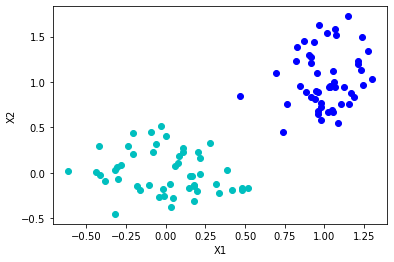

In [70]:
data_1 = pd.read_csv('lab2_files/nn_0.csv')
get_data_plot(data_1)

In [199]:
x_train, x_test, y_train, y_test = train_test_split(
        data_1.drop(['class'], axis=1), 
        data_1['class'], 
        random_state=11,
        test_size=0.3)

y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

activation_list = ['sigmoid', 'relu', 'softmax']
optimizer_list = ['adam', 'adamax', 'RMSprop', 'SGD']

for activation in activation_list:
    for optimizer in optimizer_list:
        visible = layers.Input(shape=(2,))
        hidden = layers.Dense(1, activation=activation)(visible)
        model = models.Model(inputs=visible, outputs=hidden)
        model.compile(
            optimizer = optimizer,
            loss = "binary_crossentropy",
            metrics = ["accuracy"]
        )

        model.fit(x_train, y_train, epochs=20, batch_size=2, validation_split=0.2, verbose=0)

        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
        print(f'activation: {activation}  optimizer: {optimizer}  accuracy: {test_acc}')

activation: sigmoid  optimizer: adam  accuracy: 0.13333334028720856
activation: sigmoid  optimizer: adamax  accuracy: 0.8666666746139526
activation: sigmoid  optimizer: RMSprop  accuracy: 0.1666666716337204
activation: sigmoid  optimizer: SGD  accuracy: 1.0
activation: relu  optimizer: adam  accuracy: 0.5666666626930237
activation: relu  optimizer: adamax  accuracy: 0.30000001192092896
activation: relu  optimizer: RMSprop  accuracy: 0.6000000238418579
activation: relu  optimizer: SGD  accuracy: 0.8999999761581421
activation: softmax  optimizer: adam  accuracy: 0.4333333373069763
activation: softmax  optimizer: adamax  accuracy: 0.4333333373069763
activation: softmax  optimizer: RMSprop  accuracy: 0.4333333373069763
activation: softmax  optimizer: SGD  accuracy: 0.4333333373069763


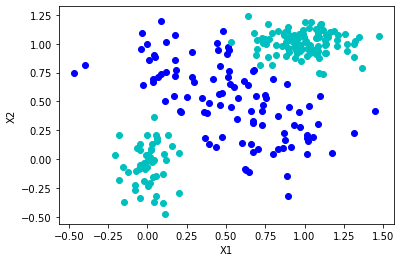

In [69]:
data_2 = pd.read_csv('lab2_files/nn_1.csv')

get_data_plot(data_2)

In [200]:
x_train, x_test, y_train, y_test = train_test_split(
        data_2.drop(['class'], axis=1), 
        data_2['class'], 
        random_state=11,
        test_size=0.3)

y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

activation_list = ['sigmoid', 'relu', 'softmax']
optimizer_list = ['adam', 'adamax', 'RMSprop', 'SGD']

for activation in activation_list:
    for optimizer in optimizer_list:
        visible = layers.Input(shape=(2,))
        hidden = layers.Dense(1, activation=activation)(visible)
        model = models.Model(inputs=visible, outputs=hidden)
        model.compile(
            optimizer = optimizer,
            loss = "binary_crossentropy",
            metrics = ["accuracy"]
        )

        model.fit(x_train, y_train, epochs=20, batch_size=2, validation_split=0.2, verbose=0)

        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
        print(f'activation: {activation}  optimizer: {optimizer}  accuracy: {test_acc}')

activation: sigmoid  optimizer: adam  accuracy: 0.3333333432674408
activation: sigmoid  optimizer: adamax  accuracy: 0.6399999856948853
activation: sigmoid  optimizer: RMSprop  accuracy: 0.5066666603088379
activation: sigmoid  optimizer: SGD  accuracy: 0.3866666555404663
activation: relu  optimizer: adam  accuracy: 0.3866666555404663
activation: relu  optimizer: adamax  accuracy: 0.3866666555404663
activation: relu  optimizer: RMSprop  accuracy: 0.4933333396911621
activation: relu  optimizer: SGD  accuracy: 0.36000001430511475
activation: softmax  optimizer: adam  accuracy: 0.6133333444595337
activation: softmax  optimizer: adamax  accuracy: 0.6133333444595337
activation: softmax  optimizer: RMSprop  accuracy: 0.6133333444595337
activation: softmax  optimizer: SGD  accuracy: 0.6133333444595337


Модель работает лучше для данных nn_0 чем nn_1. Потребовалось 20 эпох для обучения.

Для данных nn_0 лучше всех подошли функция активации sigmoid и оптимизатор SGD.

Для данных nn_1 лучше всех подошли функция активации sigmoid и оптимизатор adamax.

# Задание 2

Модифицируйте нейронную сеть из пункта 1, чтобы достичь минимальной ошибки на датасете nn_1.csv. 

Почему были выбраны именно такие гиперпараметры?

In [355]:
x_train, x_test, y_train, y_test = train_test_split(
        data_2.drop(['class'], axis=1), 
        data_2['class'], 
        random_state=11,
        test_size=0.3)

y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)


visible = layers.Input(shape=(2,))
hidden = layers.Dense(8, activation='relu', activity_regularizer=keras.regularizers.l2(0.02))(visible)
hidden_2 = layers.Dense(1, activation='relu')(hidden)
model = models.Model(inputs=visible, outputs=hidden_2)
model.compile(
    optimizer = 'SGD',
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

model.fit(x_train, y_train, epochs=12, batch_size=2, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'accuracy: {test_acc}')

Train on 140 samples, validate on 35 samples
Epoch 1/12
140/140 [==============================] - 0s 3ms/step - loss: 0.6078 - accuracy: 0.6571 - val_loss: 0.5651 - val_accuracy: 0.6000
Epoch 2/12
140/140 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.7429 - val_loss: 0.4859 - val_accuracy: 0.8286
Epoch 3/12
140/140 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8357 - val_loss: 0.4348 - val_accuracy: 0.8000
Epoch 4/12
140/140 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.9071 - val_loss: 0.3790 - val_accuracy: 0.8000
Epoch 5/12
140/140 [==============================] - 0s 2ms/step - loss: 0.2951 - accuracy: 0.9071 - val_loss: 0.3013 - val_accuracy: 0.9429
Epoch 6/12
140/140 [==============================] - 0s 2ms/step - loss: 0.2529 - accuracy: 0.9429 - val_loss: 0.2852 - val_accuracy: 0.8857
Epoch 7/12
140/140 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9357 - v

Для достижения минимальной ошибки на датасете nn_1.csv был добавлен дополнительный полносвязный слой из 8 нейронов с функцией активации relu и функцией регуляризации для того, чтобы применять штрафы к параметрам слоя.

# Задание 3

Создайте классификатор на базе нейронной сети для набора данных MNIST (так же можно загрузить с помощью torchvision.datasets.MNIST, tensorflow.keras.datasets.mnist.load_data и пр.). 

Оцените качество классификации.

In [20]:
num_train = 60000
num_test = 10000

height, width, depth = 28, 28, 1

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(num_train, height * width)
x_test = x_test.reshape(num_test, height * width)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Нормализуем
x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [19]:
visible = layers.Input(shape=(height * width,))
hidden = layers.Dense(512, activation='relu')(visible)
hidden_2 = layers.Dense(512, activation='relu')(hidden)
out = layers.Dense(10, activation='softmax')(hidden_2)

model = models.Model(inputs=visible, outputs=out)
model.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'accuracy: {test_acc}')

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 4s 83us/step - loss: 0.2488 - accuracy: 0.9253 - val_loss: 0.0934 - val_accuracy: 0.9712
Epoch 2/25
54000/54000 [==============================] - 3s 63us/step - loss: 0.0901 - accuracy: 0.9722 - val_loss: 0.0804 - val_accuracy: 0.9775
Epoch 3/25
54000/54000 [==============================] - 3s 63us/step - loss: 0.0568 - accuracy: 0.9817 - val_loss: 0.0837 - val_accuracy: 0.9760
Epoch 4/25
54000/54000 [==============================] - 3s 62us/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.0717 - val_accuracy: 0.9798
Epoch 5/25
54000/54000 [==============================] - 3s 63us/step - loss: 0.0317 - accuracy: 0.9898 - val_loss: 0.0787 - val_accuracy: 0.9780
Epoch 6/25
54000/54000 [==============================] - 3s 64us/step - loss: 0.0247 - accuracy: 0.9919 - val_loss: 0.0790 - val_accuracy: 0.9808
Epoch 7/25
54000/54000 [==============================] - 3s 64us/ste

В итоге точность модели получилась ~ 98%